In [1]:
from hlm.hierarchical.svcp import SVCP
import pysal as ps, numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

In [2]:
df = ps.pdio.read_files(ps.examples.get_path('baltim.shp'))
X = df[['AGE', 'LOTSZ', 'SQFT']].values
Y = np.log(df.PRICE).reshape(-1,1)
Yz = Y - Y.mean()
Xz = X-X.mean(axis=0)
coords = df[['X', 'Y']].values

/home/ljw/anaconda3/envs/py3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


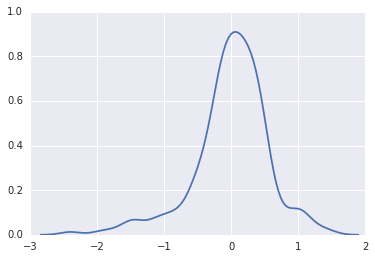

In [3]:
sns.kdeplot(Yz.flatten())

In [4]:
mod = SVCP(Yz,Xz,coords, n_samples=0, tuning=100, phi_jump=.25)
mod.configs.Phi.jump

0.25

In [5]:
mod.sample(500)

/home/ljw/anaconda3/envs/py3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


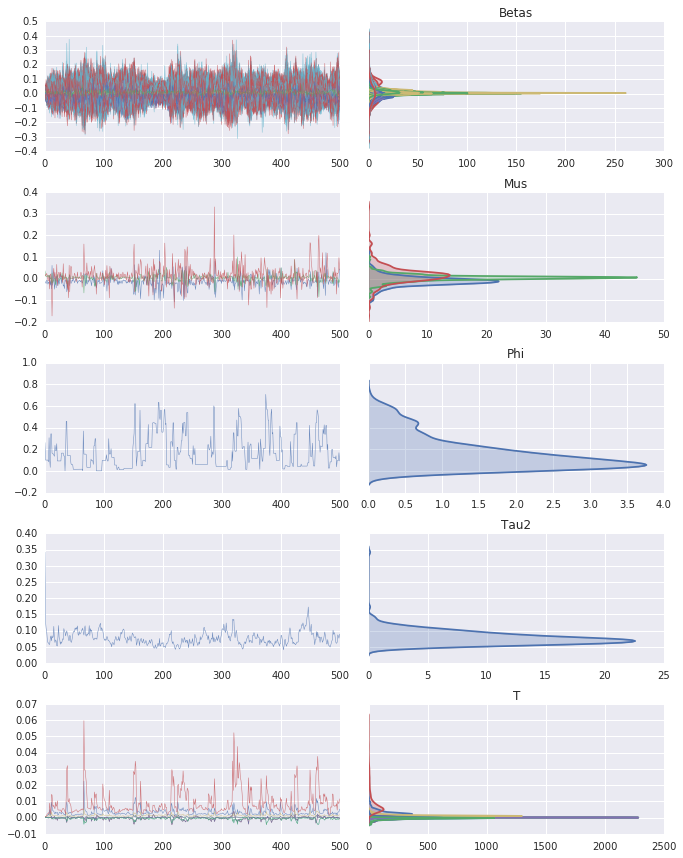

In [6]:
mod.trace.plot()
plt.tight_layout()
plt.show()

In [7]:
from hlm.plotting.svcp import corrplot

/home/ljw/anaconda3/envs/py3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


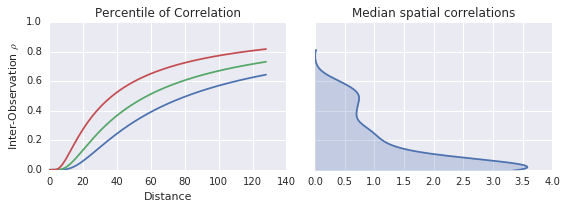

In [8]:
f,ax = corrplot(mod, thin=None, figure_kw={'figsize':(8, 3), 'sharey':True})
plt.tight_layout()
plt.show()